<a href="https://colab.research.google.com/github/27804balaji/Pytorch/blob/main/PyTorch_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Fundamentals

**Link :-** https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises

## Exercise 1

Create a random tensor with shape (7, 7).

In [ ]:
import torch

tensor = torch.rand(49).reshape(7, 7)
tensor.shape

torch.Size([7, 7])

## Excersie 2

Perform a matrix multiplication on the tensor from exercise 1 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [ ]:
x_tensor = torch.rand(7).reshape(1, 7)
x_tensor @ tensor

tensor([[1.1213, 1.8074, 1.8502, 2.1456, 1.6175, 1.7232, 2.4479]])

## Exercise 3

Set the random seed to 0 and do exercises 2 & 3 over again.

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
if device == 'cuda':
  torch.cuda.manual_seed(0)

else:
  torch.manual_seed(0)

x_tensor = torch.rand(7).reshape(1, 7)
y_tensor = torch.rand(49).reshape(7, 7)

x_tensor @ y_tensor

tensor([[1.3927, 1.1957, 1.8298, 1.6661, 1.4186, 1.4219, 0.9826]])

## Excercise 4

Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
import torch

if device == 'cuda':
  torch.cuda.manual_seed(1234)

else:
  torch.manual_seed(0)

x_tensor = torch.rand(6).reshape(2, 3)
y_tensor = torch.rand(6).reshape(2, 3)

x_tensor, y_tensor

(tensor([[0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341]]),
 tensor([[0.4901, 0.8964, 0.4556],
         [0.6323, 0.3489, 0.4017]]))

## Excercise 5

Perform a matrix multiplication on the tensors you created in excercise 4 (again, you may have to adjust the shapes of one of the tensors).

In [ ]:
matmul = x_tensor @ x_tensor.reshape(3, 2)
matmul

tensor([[0.3414, 0.5388],
        [0.2877, 0.5441]])

## Excercise 6

Find the maximum and minimum values of the output of excercise 5.

In [ ]:
torch.max(matmul)

tensor(0.5441)

In [ ]:
torch.min(matmul)

tensor(0.2877)

## Excercise 7

Find the maximum and minimum index values of the output of excercise 5

In [ ]:
torch.argmax(matmul)

tensor(3)

In [ ]:
torch.argmin(matmul)

tensor(2)

## Excercise 8

Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [ ]:
import torch

import torch

if device == 'cuda':
  torch.cuda.manual_seed(7)

else:
  torch.manual_seed(7)

x_tensor = torch.rand(10).reshape(1, 1, 1, 10)
y_tensor = x_tensor.squeeze()

x_tensor == y_tensor, x_tensor.shape, y_tensor

(tensor([[[[True, True, True, True, True, True, True, True, True, True]]]]),
 torch.Size([1, 1, 1, 10]),
 tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]))

# Excercise PyTorch Workflow

## Excercise 1

* Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [ ]:
import torch

start = 0
end = 1
step = 0.001

x = torch.arange(start, end, step)
x[:10], len(x)

(tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
         0.0090]),
 1000)

In [ ]:
weight = 0.3
bias = 0.9

y = weight * x + bias
y[:10], len(y)

(tensor([0.9000, 0.9003, 0.9006, 0.9009, 0.9012, 0.9015, 0.9018, 0.9021, 0.9024,
         0.9027]),
 1000)

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'X' : x,
    'Y' : y
})

data.head(10)

,X,Y
0,0.000,0.9000
1,0.001,0.9003
2,0.002,0.9006
3,0.003,0.9009
4,0.004,0.9012
5,0.005,0.9015
6,0.006,0.9018
7,0.007,0.9021
8,0.008,0.9024
9,0.009,0.9027


In [ ]:
train_split = int(0.8 * len(data))
train_split

800

In [ ]:
x_train, y_train = data.X[:train_split], data.Y[:train_split]
x_test, y_test = data.Y[train_split:], data.Y[train_split:]

In [ ]:
import matplotlib.pyplot as plt

def plot(train_data,
         train_label,
         test_label,
         test_data):
  plt.figure(figsize = (7, 7))
  plt.scatter(train_data, train_label, color = 'g', s = 5, label = 'Train Data')
  plt.scatter(test_data, test_label, color = 'r', s = 5, label = 'Test Data')
  plt.legend(prop = {'size' : 10})
  # plt.axis(False)
  plt.show()

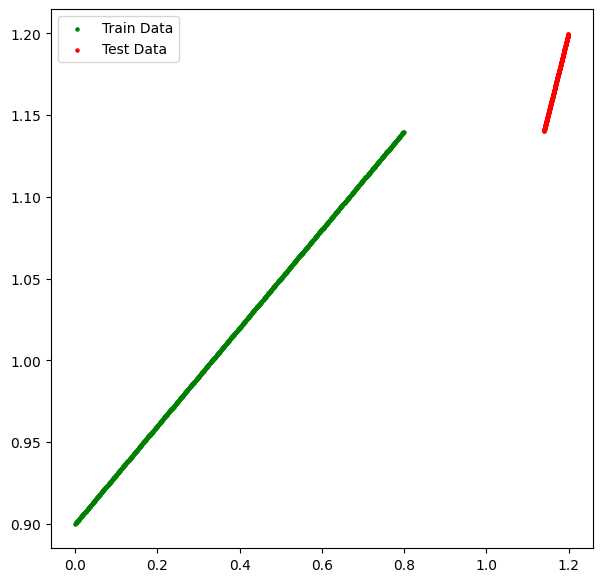

In [ ]:
plot(
      train_data = x_train,
      train_label = y_train,
      test_data = x_test,
      test_label = y_test)

## Excercise 2

* Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from torch import nn

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,
                                          requires_grad = True,
                                          dtype = torch.float32))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float32))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

  def save(self, path):
    torch.save(self.state_dict(), path)

In [ ]:
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

## Excercise 3

* Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in excercise 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
weight = 0.3
bias = 0.9

strat = 0
end = 1
step = 0.001

x = torch.arange(start, end, step)
y = weight * x + bias

len(x), len(x)

(1000, 1000)

In [ ]:
trainig_split = int(0.8 * len(x))
train_split

800

In [ ]:
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]


print(len(x_train), len(y_train), len(x_test), len(y_test))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

800 800 200 200
torch.Size([800]) torch.Size([800]) torch.Size([200]) torch.Size([200])


In [ ]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([0.3829])), ('bias', tensor([0.9593]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr= 0.001)

In [ ]:
from torch import nn

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)


# Trainig and Testing loop...

epochs = 300
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
model = model.to(device)

for epoch in range(epochs):
  # Training...
  model.train()

  y_pred = model(x_train)
  train_loss = loss_fn(y_pred, y_train)

  # optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Testing...
  model.eval()

  test_pred = model(x_test)
  test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    print(f'Epoch : {epoch} | Training Loss : {train_loss:.4f} | Testing Loss : {test_loss:.4f}')

Epoch : 0 | Training Loss : 0.0924 | Testing Loss : 0.1325
Epoch : 20 | Training Loss : 0.0793 | Testing Loss : 0.0749
Epoch : 40 | Training Loss : 0.0326 | Testing Loss : 0.0710
Epoch : 60 | Training Loss : 0.0350 | Testing Loss : 0.0402
Epoch : 80 | Training Loss : 0.0800 | Testing Loss : 0.0817
Epoch : 100 | Training Loss : 0.0894 | Testing Loss : 0.1003
Epoch : 120 | Training Loss : 0.0736 | Testing Loss : 0.1064
Epoch : 140 | Training Loss : 0.0303 | Testing Loss : 0.0269
Epoch : 160 | Training Loss : 0.0331 | Testing Loss : 0.0031
Epoch : 180 | Training Loss : 0.0763 | Testing Loss : 0.1115
Epoch : 200 | Training Loss : 0.0900 | Testing Loss : 0.0767
Epoch : 220 | Training Loss : 0.0751 | Testing Loss : 0.1186
Epoch : 240 | Training Loss : 0.0317 | Testing Loss : 0.0325
Epoch : 260 | Training Loss : 0.0336 | Testing Loss : 0.0165
Epoch : 280 | Training Loss : 0.0758 | Testing Loss : 0.0808


## Excercise 4

* Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)

y_pred == y_test

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [ ]:
import matplotlib.pyplot as plt

def plot(train_label,
         train_data,
         test_data,
         test_label,
         prediction = None):
  plt.scatter(train_data, train_label, color = 'b', s = 3, label = 'Training Data')
  plt.scatter(test_data, test_label, color = 'g', s =3, label = 'Testing Data')

  if prediction is not None:
    if isinstance(prediction, torch.Tensor):
        prediction = prediction.cpu()
    plt.scatter(test_data, prediction, color = 'r', s = 3, label = 'Prediction')

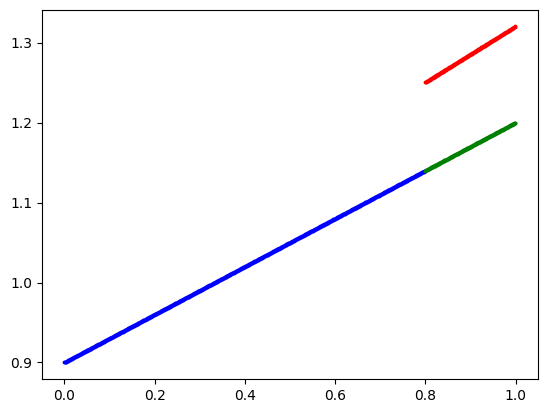

In [ ]:
plot(train_data = x_train.cpu(),
     train_label = y_train.cpu(),
     test_data = x_test.cpu(),
     test_label = y_test.cpu(),
     prediction = y_pred
     )

## Excercise 5

* Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
model.save('LinearModel.pth')

In [ ]:
loaded_model = torch.load('/content/LinearModel.pth')
mode_1 = model.load_state_dict(loaded_model)
mode_1

<All keys matched successfully>

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)

y_test[:10] == y_pred[:10]

tensor([False, False, False, False, False, False, False, False, False, False])

# Excercise Neural netwowrk Classification.

## Excercise 1

* Make a binary classification dataset with Scikit-Learn's make_moons() function.
* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [185]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [186]:
import pandas as pd
from sklearn.datasets import make_moons

data = make_moons(n_samples=1000,
                  shuffle=True,
                  noise=None,
                  random_state=42)
x = data[0]
y = data[1]

data_frame = pd.DataFrame({
    'X1' : x[:,0],
    'X2' : x[:,1],
    'Y' : y
})

data_frame.head()

,X1,X2,Y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


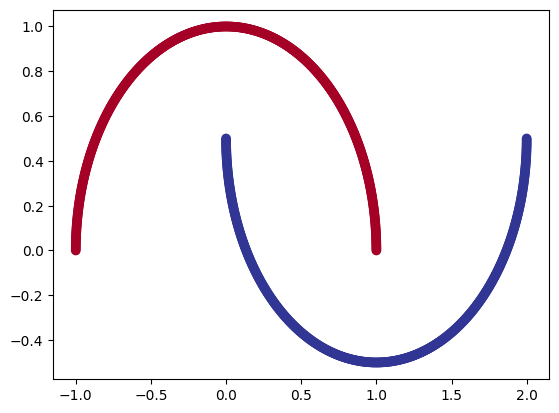

In [187]:
import matplotlib.pyplot as plt

plt.scatter(x= data_frame.X1,
            y= data_frame.X2,
            c = data_frame.Y,
            cmap = plt.cm.RdYlBu)

plt.show();

In [188]:
x.shape, y.shape

((1000, 2), (1000,))

In [189]:
x.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [190]:
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [191]:
x.dtype, y.dtype

(torch.float32, torch.float32)

In [192]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [193]:
len(y_test.unique())

2

## Excercise 2

* Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [194]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [195]:
from torch import nn

class MoonModel(nn.Module):
  def __init__(self):
    super().__init__()
    # self.flatten_layer = nn.Flatten()
    self.layer_1 = nn.Linear(in_features = x_train.shape[1], out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = len(y.unique()))
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

In [196]:
model = MoonModel()
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927]])),
             ('layer_2.bias', tensor([-0.3130, -0.1222]))])

In [197]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927]], requires_grad=True),
 Parameter containing:
 tensor([-0.3130, -0.1222], requires_grad=True)]

## Excercise 3

* Setup a binary classification compatible loss function and optimizer to use when training the model.

In [198]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)

## Excercise 4

* Create a training and testing loop to fit the model you created in excercise 2 to the data you created in 1.
* To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [199]:
x_train.dtype, y_train.dtype

(torch.float32, torch.float32)

In [227]:
def accuracy(y_true, y_pred):
  y_pred_class = torch.argmax(y_pred, dim=1)
  correct = torch.eq(y_true, y_pred_class).sum().item() # y_train == torch.argmax(y_pred, dim = 1)
  acc = (correct / len(y_pred)) * 100
  return acc

In [228]:
if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)


epochs = 10000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
model = model.to(device)

for epoch in range(epochs):
  # Training...

  model.train()

  y_pred = model(x_train.to(device))
  train_loss = loss_fn(y_pred, y_train.long())
  train_acc = accuracy(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Testing...

  model.eval()

  test_pred = model(x_test.to(device))
  test_loss = loss_fn(test_pred, y_test.long())
  test_acc = accuracy(y_true = y_test, y_pred = test_pred)

  if epoch % 1000 == 0:
    print(f'Epoch : {epoch} | Train Loss : {train_loss:.4f} | Train Accuracy : {train_acc:.4f} | Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f}')

Epoch : 0 | Train Loss : 1.1112 | Train Accuracy : 33.7500 | Test Loss : 1.1298 | Test Accuracy : 31.6667
Epoch : 1000 | Train Loss : 0.0235 | Train Accuracy : 99.1667 | Test Loss : 0.0523 | Test Accuracy : 98.3333
Epoch : 2000 | Train Loss : 0.0131 | Train Accuracy : 99.5833 | Test Loss : 0.0717 | Test Accuracy : 98.3333
Epoch : 3000 | Train Loss : 0.0098 | Train Accuracy : 99.5833 | Test Loss : 0.1163 | Test Accuracy : 98.3333
Epoch : 4000 | Train Loss : 0.0080 | Train Accuracy : 99.5833 | Test Loss : 0.1834 | Test Accuracy : 98.3333
Epoch : 5000 | Train Loss : 0.0068 | Train Accuracy : 99.5833 | Test Loss : 0.3052 | Test Accuracy : 96.6667
Epoch : 6000 | Train Loss : 0.0063 | Train Accuracy : 99.5833 | Test Loss : 0.4529 | Test Accuracy : 96.6667
Epoch : 7000 | Train Loss : 0.0063 | Train Accuracy : 99.5833 | Test Loss : 0.3170 | Test Accuracy : 98.3333
Epoch : 8000 | Train Loss : 0.0060 | Train Accuracy : 99.5833 | Test Loss : 0.3002 | Test Accuracy : 98.3333
Epoch : 9000 | Train L

In [203]:
import torch

with torch.inference_mode():
  Y_pred = model(x_test.to(device))

Y_pred_class = torch.argmax(Y_pred, dim = 1)
Y_pred_class[:10] == y_test[:10]

tensor([True, True, True, True, True, True, True, True, True, True])

## Excercise 5

* Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def plot_decision(model: nn.Module, X: torch.Tensor, y: torch.Tensor):
    model.to(device)
    X, y = X.to(device), y.to(device)

    # Convert tensors to numpy for plotting
    X_np = X.cpu().detach().numpy() # detach() remove gradient
    y_np = y.cpu().detach().numpy() # numpy() convert tensor into numpy for better plotting.

    # Generate a mesh grid for decision boundary
    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # np.linspace() generates 100 evenly spaced points between min-1 and max+1 for both features.
                         np.linspace(y_min, y_max, 100))  # np.meshgrid() creates a 2D grid of points.

    # Convert grid to tensor and predict
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device) # ravel() flatten the mes_grid and [xx.ravel(), yy.ravel()] stack them into points.
    with torch.no_grad():
        pred = model(grid).cpu().numpy()

    # Reshape predictions
    if pred.shape[1] > 1:
        pred = np.argmax(pred, axis=1)  # Multiclass case
    else:
        pred = (pred > 0.5).astype(int)  # Binary classification

    pred = pred.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the actual data points
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=plt.cm.coolwarm, edgecolors='k')

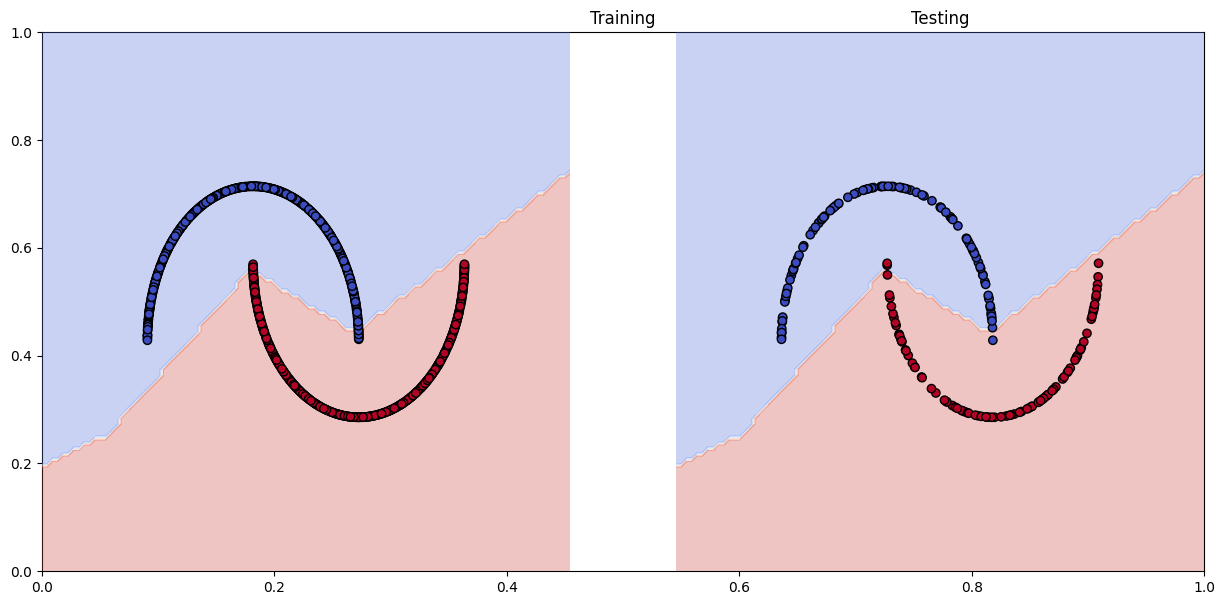

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))
plt.title('Training')
plt.subplot(1, 2, 1)
plot_decision(model, x_train, y_train)
plt.axis(False)

plt.subplot(1, 2, 2)
plt.title('Testing')
plot_decision(model, x_test, y_test)
plt.axis(False)
plt.show();


## Exercise 6

* Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

In [206]:
A = torch.arange(0, 1, 0.02)
A

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

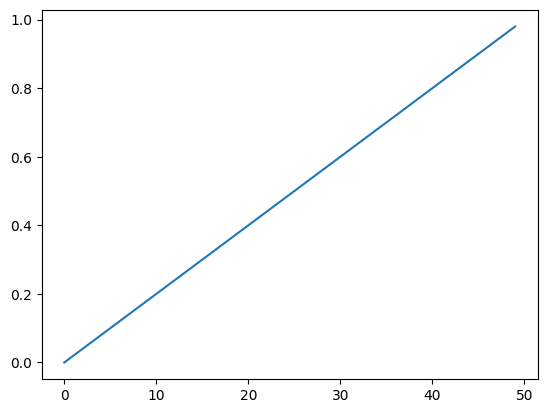

In [207]:
import matplotlib.pyplot as plt

plt.plot(A);

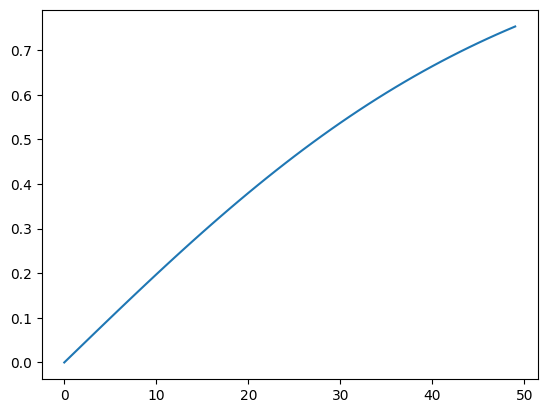

In [208]:
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(A));

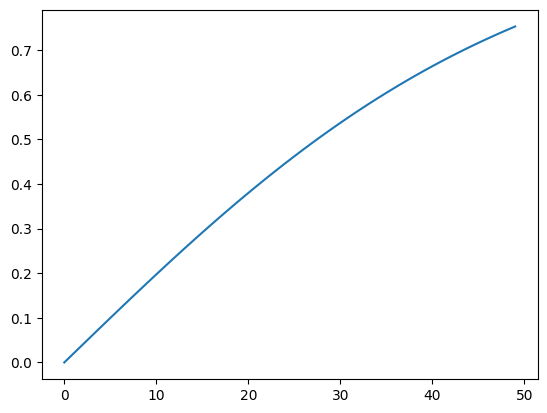

In [209]:
plt.plot(torch.tanh(A));

## Excercise 7

* Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

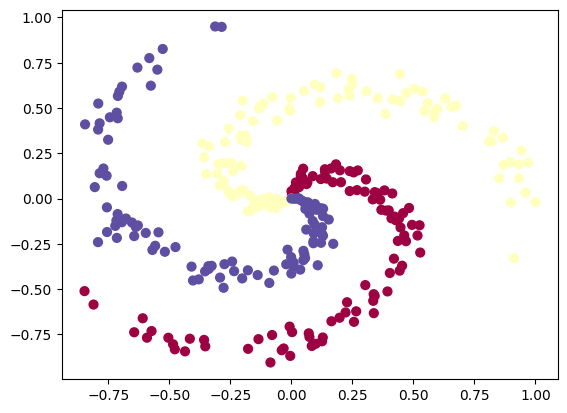

In [210]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [211]:
X.dtype, type(X)

(dtype('float64'), numpy.ndarray)

In [212]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X.dtype, y.dtype

(torch.float32, torch.float32)

In [213]:
X.shape, y.shape

(torch.Size([300, 2]), torch.Size([300]))

In [214]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [215]:
x_train.shape[1], len(y_train.unique())

(2, 3)

In [216]:
from torch import nn

class CS2Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_stack = nn.Sequential(
        nn.Linear(in_features = x_train.shape[1], out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = len(y_train.unique()))
    )

  def forward(self, x):
    return self.linear_stack(x)

In [217]:
model = CS2Model()
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('linear_stack.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('linear_stack.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  

In [218]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [236]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(),
                       lr = 0.01)

In [278]:
def accuracy(y_true, y_pred):
  correct_prediction = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_prediction / len(y_pred)) * 100
  return acc

In [285]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)

epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
model = model.to(device)


for epoch in range(epochs):
  # Trainig...

  model.train()

  y_pred = model(x_train.to(device))
  y_pred_class = torch.argmax(y_pred, dim = 1)
  train_loss = loss_fn(y_pred, y_train.long())
  train_acc = accuracy(y_pred_class, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Testing...

  test_pred = model(x_test.to(device))
  test_pred_class = torch.argmax(test_pred, dim = 1)
  test_loss = loss_fn(test_pred, y_test.long())
  test_acc = accuracy(test_pred_class, y_test)

  if epoch % 100 == 0:
    print(f'Epoch : {epoch} | Train Loss : {train_loss:.4f} | Train Accuracy : {train_acc:.4f} | Test Loss : {test_loss:.4f} Test Accuracy : {test_acc:.4f}')

Epoch : 0 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 1.0209 Test Accuracy : 95.0000
Epoch : 100 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9940 Test Accuracy : 95.0000
Epoch : 200 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9448 Test Accuracy : 95.0000
Epoch : 300 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9355 Test Accuracy : 95.0000
Epoch : 400 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9116 Test Accuracy : 95.0000
Epoch : 500 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9356 Test Accuracy : 95.0000
Epoch : 600 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.9081 Test Accuracy : 95.0000
Epoch : 700 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.8805 Test Accuracy : 96.6667
Epoch : 800 | Train Loss : 0.0058 | Train Accuracy : 99.5833 | Test Loss : 0.8707 Test Accuracy : 96.6667
Epoch : 900 | Train Loss : 0.0058 | Train Accura

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def plot_decision(model: nn.Module, X: torch.Tensor, y: torch.Tensor):
    model.to(device)
    X, y = X.to(device), y.to(device)

    # Convert tensors to numpy for plotting
    X_np = X.cpu().detach().numpy() # detach() remove gradient
    y_np = y.cpu().detach().numpy() # numpy() convert tensor into numpy for better plotting.

    # Generate a mesh grid for decision boundary
    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # np.linspace() generates 100 evenly spaced points between min-1 and max+1 for both features.
                         np.linspace(y_min, y_max, 100))  # np.meshgrid() creates a 2D grid of points.

    # Convert grid to tensor and predict
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device) # ravel() flatten the mes_grid and [xx.ravel(), yy.ravel()] stack them into points.
    with torch.no_grad():
        pred = model(grid).cpu().numpy()

    # Reshape predictions
    if pred.shape[1] > 1:
        pred = np.argmax(pred, axis=1)  # Multiclass case
    else:
        pred = (pred > 0.5).astype(int)  # Binary classification

    pred = pred.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the actual data points
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=plt.cm.coolwarm, edgecolors='k')

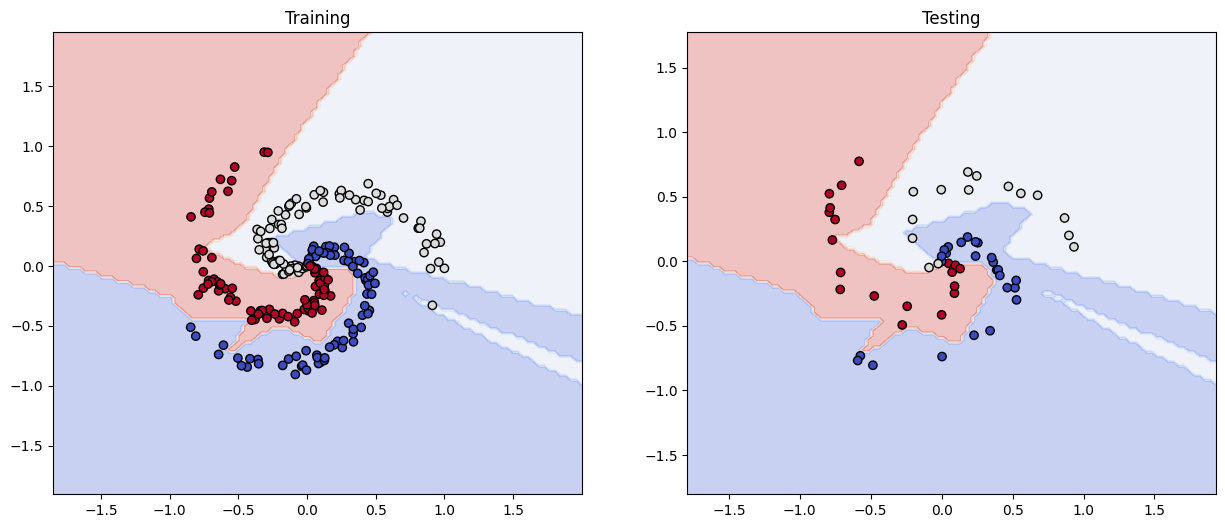

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Training')
plot_decision(model, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Testing')
plot_decision(model, x_test, y_test)